In [1]:
import graphlab
import numpy as np

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sales = graphlab.SFrame('kc_house_data.gl/')

[INFO] 1450265047 : INFO:     (initialize_globals_from_environment:282): Setting configuration variable GRAPHLAB_FILEIO_ALTERNATIVE_SSL_CERT_FILE to C:\Users\margrami\AppData\Local\Dato\Dato Launcher\lib\site-packages\certifi\cacert.pem
1450265047 : INFO:     (initialize_globals_from_environment:282): Setting configuration variable GRAPHLAB_FILEIO_ALTERNATIVE_SSL_CERT_DIR to 
This non-commercial license of GraphLab Create is assigned to margrami221@yahoo.com and will expire on October 13, 2016. For commercial licensing options, visit https://dato.com/buy/.

[INFO] Start server at: ipc:///tmp/graphlab_server-6572 - Server binary: C:\Users\margrami\AppData\Local\Dato\Dato Launcher\lib\site-packages\graphlab\unity_server.exe - Server log: C:\Users\margrami\AppData\Local\Temp\graphlab_server_1450265047.log.0
[INFO] GraphLab Server Version: 1.7.1


In [4]:
train_and_validation_data, test_data = sales.random_split(0.9, seed=1)
train_data, val_data = train_and_validation_data.random_split(0.5, seed=1)

In [48]:
## Nice function 
def polynomial_sframe(feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    poly_sframe = graphlab.SFrame()
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_sframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        for power in range(2, degree+1): 
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # then assign poly_sframe[name] to the appropriate power of feature
            poly_sframe[str(name)] = feature.apply(lambda x: x**power)
    return poly_sframe

In [57]:
val_data_poly = polynomial_sframe(val_data['sqft_living'], 15)
val_data_poly['price'] = val_data['price']

In [5]:
example_features = ['sqft_living']
example_model = graphlab.linear_regression.create(train_data, target = 'price', features = example_features, 
                                                  validation_set = None)

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 9761
PROGRESS: Number of features          : 1
PROGRESS: Number of unpacked features : 1
PROGRESS: Number of coefficients    : 2
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | 1         | 2        | 1.006058     | 4281899.752120     | 269130.237810 |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: SUCCESS: Optimal solution found.
PROGRESS:


In [35]:
#degree_vec = [power_1: 1, power_2: 2]
degree =3
for power in range(2, degree+1):
    name = 'power_' + str(power)
    train_data[name] = train_data['sqft_living'].apply(lambda x : x**power)

    

In [7]:
train_data['power_2'] = train_data['sqft_living'].apply(lambda x: x**2)

In [55]:
example_features2 = ['sqft_living', 'power_2']
example_model2 = graphlab.linear_regression.create(train_data, target = 'price', features = example_features2, 
                                                  validation_set = None)

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 9761
PROGRESS: Number of features          : 2
PROGRESS: Number of unpacked features : 2
PROGRESS: Number of coefficients    : 3
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | 1         | 2        | 0.057004     | 2178241.745694     | 251556.256489 |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: SUCCESS: Optimal solution found.
PROGRESS:


In [58]:
my_rmse1 = graphlab.evaluation.rmse(val_data['price'], example_model.predict(val_data_poly))
print my_rmse1

356204.819707


In [59]:
my_rmse2 = graphlab.evaluation.rmse(val_data['price'], example_model2.predict(val_data_poly))
print my_rmse2

254396.567803


In [11]:
train_data['power_3'] = train_data['sqft_living'].apply(lambda x: x**3)

In [17]:
example_features3 = ['sqft_living', 'power_2', 'power_3',]
example_model3 = graphlab.linear_regression.create(train_data, target = 'price', features = example_features3, 
                                                  validation_set = None)

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 9761
PROGRESS: Number of features          : 3
PROGRESS: Number of unpacked features : 3
PROGRESS: Number of coefficients    : 4
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | 1         | 2        | 0.009001     | 2180018.952102     | 251553.957210 |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: SUCCESS: Optimal solution found.
PROGRESS:


In [60]:
my_rmse3 = graphlab.evaluation.rmse(val_data['price'], example_model3.predict(val_data_poly))
print my_rmse3

254436.402592


In [14]:
train_data['power_4'] = train_data['sqft_living'].apply(lambda x: x**4)

In [19]:
example_features4 = ['sqft_living', 'power_2', 'power_3', 'power_4']
example_model4 = graphlab.linear_regression.create(train_data, target = 'price', features = example_features4, 
                                                  validation_set = None)

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 9761
PROGRESS: Number of features          : 4
PROGRESS: Number of unpacked features : 4
PROGRESS: Number of coefficients    : 5
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | 1         | 2        | 0.010001     | 2177902.820678     | 251547.340368 |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: SUCCESS: Optimal solution found.
PROGRESS:


In [61]:
my_rmse4 = graphlab.evaluation.rmse(val_data['price'], example_model4.predict(val_data_poly))
print my_rmse4

257103.613131


In [23]:
train_data['power_5'] = train_data['sqft_living'].apply(lambda x: x**5)

In [25]:
example_features5 = ['sqft_living', 'power_2', 'power_3', 'power_4', 'power_5']
example_model5 = graphlab.linear_regression.create(train_data, target = 'price', features = example_features5, 
                                                  validation_set = None)

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 9761
PROGRESS: Number of features          : 5
PROGRESS: Number of unpacked features : 5
PROGRESS: Number of coefficients    : 6
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | 1         | 2        | 0.012001     | 2180170.340936     | 251539.605331 |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: SUCCESS: Optimal solution found.
PROGRESS:


In [62]:
my_rmse5 = graphlab.evaluation.rmse(val_data['price'], example_model5.predict(val_data_poly))
print my_rmse5

263623.624317


In [29]:
train_data['power_6'] = train_data['sqft_living'].apply(lambda x: x**6)

In [30]:
example_features6 = ['sqft_living', 'power_2', 'power_3', 'power_4', 'power_5', 'power_6']
example_model6 = graphlab.linear_regression.create(train_data, target = 'price', features = example_features6, 
                                                  validation_set = None)

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 9761
PROGRESS: Number of features          : 6
PROGRESS: Number of unpacked features : 6
PROGRESS: Number of coefficients    : 7
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | 1         | 2        | 0.014001     | 2167607.118087     | 251031.838234 |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: SUCCESS: Optimal solution found.
PROGRESS:


In [63]:
my_rmse6 = graphlab.evaluation.rmse(val_data['price'], example_model6.predict(val_data_poly))
print my_rmse6

336060.433861


In [32]:
train_data['power_7'] = train_data['sqft_living'].apply(lambda x: x**7)

In [33]:
example_features7 = ['sqft_living', 'power_2', 'power_3', 'power_4', 'power_5', 'power_6', 'power_7']
example_model7 = graphlab.linear_regression.create(train_data, target = 'price', features = example_features7, 
                                                  validation_set = None)

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 9761
PROGRESS: Number of features          : 7
PROGRESS: Number of unpacked features : 7
PROGRESS: Number of coefficients    : 8
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | 1         | 2        | 0.016001     | 2174405.074099     | 250758.782879 |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: SUCCESS: Optimal solution found.
PROGRESS:


In [64]:
my_rmse7 = graphlab.evaluation.rmse(val_data['price'], example_model7.predict(val_data_poly))
print my_rmse7

453947.272142


In [37]:
train_data['power_8'] = train_data['sqft_living'].apply(lambda x: x**8)

In [38]:
example_features8 = ['sqft_living', 'power_2', 'power_3', 'power_4', 'power_5', 'power_6', 'power_7', 'power_8']
example_model8 = graphlab.linear_regression.create(train_data, target = 'price', features = example_features8, 
                                                  validation_set = None)

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 9761
PROGRESS: Number of features          : 8
PROGRESS: Number of unpacked features : 8
PROGRESS: Number of coefficients    : 9
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | 1         | 2        | 0.015001     | 2182330.352862     | 250703.752759 |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: SUCCESS: Optimal solution found.
PROGRESS:


In [39]:
my_rmse8 = graphlab.evaluation.rmse(val_data['price'], example_model8.predict(val_data))
print my_rmse8

266524.605791


In [41]:
def get_residual_sum_of_squares(model, data, outcome):
    # First get the predictions
    predictions = model.predict(data)
    residuals = np.zeros((len(data)))
    for j in range (0, len(data)):
        # Then compute the residuals/errors
        residuals[j] = (outcome[j] - predictions[j])**2

        # Then square and add them up
        
    RSS = np.sum(residuals)
    return(RSS)    

In [67]:
test_data_poly = polynomial_sframe(test_data['sqft_living'], 2)
test_data_poly['price'] = test_data['price']

In [68]:
RSS_poly2 = get_residual_sum_of_squares(example_model2, test_data_poly, test_data_poly['price'] )
print RSS_poly2

1.35560308139e+14


In [75]:
RSS_poly3 = get_residual_sum_of_squares(example_model3, test_data_poly, test_data_poly['price'] )
print RSS_poly3

1.3575203532e+14


In [74]:
RSS_poly6 = get_residual_sum_of_squares(example_model6, test_data_poly, test_data_poly['price'] )
print RSS_poly6

3.32678289673e+15


# Importante hacer el sort antes de graficar con una linea continua '-'

In [69]:
val_data = val_data.sort(['sqft_living', 'price'])
val_data_poly = val_data_poly.sort(['power_1', 'price'])

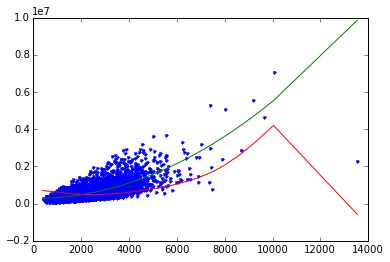

In [80]:
plt.plot(val_data['sqft_living'], val_data['price'],'.',
        val_data_poly['power_1'], example_model2.predict(val_data_poly),'-',val_data_poly['power_1'], example_model6.predict(val_data_poly),'-' )